# Estudo sobre as eleições municipais de 2020 e 2024 no estado de Minas Gerais

## Instalando e importando os pacotes necessários

In [50]:
!pip install plotly geopandas matplotlib pandas shapely

In [51]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import Point

## Funções utilizadas no programa

In [52]:
def processar_candidatos_mais_votados(tabela_arquivo):
    return tabela_arquivo\
        .sort_values(by='NM_UE', ascending=False)\
        .groupby(['NM_PARTIDO', 'NM_UE'])\
        .agg({'QT_VOTOS_NOMINAIS_VALIDOS': 'first', 'NR_PARTIDO': 'first'})\
        .reset_index()

def gerar_grafico_partidos_mais_votados(df, ano):
    # Agrupar os dados por partido e contar o número de municípios em que cada partido venceu
    votos_por_partido = df.groupby('NM_PARTIDO')['QT_VOTOS_NOMINAIS_VALIDOS'].count().reset_index()
    votos_por_partido = votos_por_partido.sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS', ascending=False)

    # Gerar o gráfico de barras
    fig = px.bar(votos_por_partido, 
                 x='NM_PARTIDO', 
                 y='QT_VOTOS_NOMINAIS_VALIDOS', 
                 title=f'Partidos mais votados em {ano}',
                 labels={'QT_VOTOS_NOMINAIS_VALIDOS': 'Número de Municípios', 'NM_PARTIDO': 'Partido'},
                 color='NM_PARTIDO')

    fig.show()

def plot_mapa(mapa, ano):
    # Verifica se é um GeoDataFrame
    if not isinstance(mapa, gpd.GeoDataFrame):
        print("O DataFrame não é um GeoDataFrame.")
        return
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    # Defina as cores baseadas nos partidos (exemplo)
    cores = {'direita': 'direita', 'esquerda': 'esquerda', 'centro': 'centro'}
    
    # Verifique se a coluna de partido existe
    if 'NM_PARTIDO' in mapa.columns:
        mapa['cor'] = mapa['Espectro'].map(cores)
    else:
        print("A coluna 'Espectro' não foi encontrada no DataFrame.")
        return
    
    mapa.boundary.plot(ax=ax, linewidth=1)
    
    mapa.plot(column='cor', ax=ax, legend=True)
    
    ax.set_title(f'Eleições Municipais de {ano} em Minas Gerais')
    plt.show()

## Definindo arquivos necessários e váriaveis globais 

In [53]:
# Caminho para os arquivos utilizados
# Coloque o path da sua máquina aqui onde está o projeto
pasta = 'C:\\Users\\marce\\OneDrive\\Área de Trabalho\\analise_eleitoral\\dados\\'
arquivo_resultado_2020 = os.path.join(pasta, 'votacao_2020.csv')
arquivo_resultado_2024 = os.path.join(pasta, 'votacao_2024.csv')
arquivo_partidos = os.path.join(pasta,'partidos.csv')
arquivo_municipios = 'C:\\Users\\marce\\OneDrive\\Área de Trabalho\\analise_eleitoral\\dados\\brasil-municipios.csv'

In [54]:
# Alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

In [55]:
# Lendo os dados dos arquivos
tabela_arquivo_2020 = pd.read_csv(arquivo_resultado_2020, sep=';', encoding = "ISO-8859-1")
tabela_arquivo_2024 = pd.read_csv(arquivo_resultado_2024, sep=';', encoding = "ISO-8859-1")
tabela_partidos = pd.read_csv(arquivo_partidos, sep=';')

In [56]:
candidatos_mais_votados_2020 = processar_candidatos_mais_votados(tabela_arquivo_2020)

In [57]:
display(candidatos_mais_votados_2020)

,NM_PARTIDO,NM_UE,QT_VOTOS_NOMINAIS_VALIDOS,NR_PARTIDO
0,AVANTE,AIMORÉS,627,70
1,AVANTE,ALBERTINA,456,70
2,AVANTE,ALFENAS,1953,70
3,AVANTE,ALFREDO VASCONCELOS,672,70
4,AVANTE,ALTEROSA,2707,70
...,...,...,...,...
6264,Solidariedade,ÁGUAS VERMELHAS,76,77
6265,Unidade Popular,BELO HORIZONTE,726,80
6266,Unidade Popular,ITABIRITO,477,80
6267,Unidade Popular,NOVA LIMA,764,80


In [58]:
candidatos_mais_votados_2024 = processar_candidatos_mais_votados(tabela_arquivo_2024)

In [59]:
display(candidatos_mais_votados_2024)

,NM_PARTIDO,NM_UE,QT_VOTOS_NOMINAIS_VALIDOS,NR_PARTIDO
0,AGIR,ALPINÓPOLIS,752,36
1,AGIR,ALVINÓPOLIS,758,36
2,AGIR,ANDRADAS,1186,36
3,AGIR,ARAXÁ,2387,36
4,AGIR,ARCOS,2288,36
...,...,...,...,...
8362,União Brasil,VIRGINÓPOLIS,526,44
8363,União Brasil,VIRGÍNIA,704,44
8364,União Brasil,VISCONDE DO RIO BRANCO,2103,44
8365,União Brasil,VIÇOSA,16346,44


## Unindo as tabelas dos candidatos e dos partidos
### Assim podemos definir quais candidatos são de direita, esquerda ou centro

In [60]:
espec_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)
tabela_partidos['Espectro'] = tabela_partidos['Espectro'].astype(espec_type)

In [61]:
candidatos_mais_votados_2020 = candidatos_mais_votados_2020.\
merge(tabela_partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [62]:
candidatos_mais_votados_2024 = candidatos_mais_votados_2024.\
merge(tabela_partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

## Gráficos dos partidos mais votados nos anos de 2020 e 2024

In [63]:
gerar_grafico_partidos_mais_votados(candidatos_mais_votados_2020, 2020)

In [64]:
gerar_grafico_partidos_mais_votados(candidatos_mais_votados_2024, 2024)

## Quem venceu mais: Esquerda ou Direita?


In [65]:
!pip install pyogrio

In [66]:
df = pd.read_csv(arquivo_municipios)

In [67]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

In [68]:
df_mg = df[df['codigo_uf'] == 31]

# Converter ambos para string, por exemplo
df_mg.loc[:, 'nome'] = df_mg['nome'].astype(str)
candidatos_mais_votados_2024.loc[:, 'NM_UE'] = candidatos_mais_votados_2024['NM_UE'].astype(str)

# Usar .loc[] para modificar o campo 'nome' diretamente no DataFrame original
df_mg.loc[:, 'nome'] = df_mg['nome'].str.upper()

# Verificar se a conversão para maiúsculo foi aplicada
print(df_mg['nome'].head())


1     ABADIA DOS DOURADOS
3                  ABAETÉ
12             ABRE CAMPO
15                ACAIACA
29                AÇUCENA
Name: nome, dtype: object


In [69]:
candidatos_mais_votados_2020_geo_df = df_mg.merge(candidatos_mais_votados_2020, left_on='nome', right_on='NM_UE')
candidatos_mais_votados_2024_geo_df = df_mg.merge(candidatos_mais_votados_2024, left_on='nome', right_on='NM_UE')

In [70]:
candidatos_mais_votados_2020_geo_df['geometry'] = candidatos_mais_votados_2020_geo_df.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
candidatos_mais_votados_2024_geo_df['geometry'] = candidatos_mais_votados_2024_geo_df.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)

In [71]:
candidatos_mais_votados_2020.columns = candidatos_mais_votados_2020.columns.str.strip()

print(candidatos_mais_votados_2020_geo_df.columns) 

try:
    candidatos_mais_votados_2020_geo_df = gpd.GeoDataFrame(candidatos_mais_votados_2020_geo_df, geometry='geometry')
    print(type(candidatos_mais_votados_2020_geo_df))  # Verifique o tipo
    print(candidatos_mais_votados_2020_geo_df.head())  # Verifique as primeiras linhas
except ValueError as e:
    print("Erro ao criar o GeoDataFrame:", e)

Index(['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital', 'codigo_uf',
       'NM_PARTIDO', 'NM_UE', 'QT_VOTOS_NOMINAIS_VALIDOS', 'NR_PARTIDO',
       'Espectro', 'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
   codigo_ibge                 nome  latitude  longitude  capital  codigo_uf  \
0      3100104  ABADIA DOS DOURADOS  -18.4831   -47.3916        0         31   
1      3100104  ABADIA DOS DOURADOS  -18.4831   -47.3916        0         31   
2      3100104  ABADIA DOS DOURADOS  -18.4831   -47.3916        0         31   
3      3100104  ABADIA DOS DOURADOS  -18.4831   -47.3916        0         31   
4      3100104  ABADIA DOS DOURADOS  -18.4831   -47.3916        0         31   

                                NM_PARTIDO                NM_UE  \
0                                Cidadania  ABADIA DOS DOURADOS   
1                               Democratas  ABADIA DOS DOURADOS   
2                   Partido Social Cristão  ABADIA DOS DOURADOS   

In [72]:
candidatos_mais_votados_2020_geo_df = gpd.GeoDataFrame(candidatos_mais_votados_2020_geo_df, geometry='geometry')
candidatos_mais_votados_2024_geo_df = gpd.GeoDataFrame(candidatos_mais_votados_2024_geo_df, geometry='geometry')

In [73]:
# Remover linhas com geometrias vazias
candidatos_mais_votados_2020_geo_df = candidatos_mais_votados_2020_geo_df[~candidatos_mais_votados_2020_geo_df['geometry'].is_empty]
candidatos_mais_votados_2020_geo_df = candidatos_mais_votados_2020_geo_df[candidatos_mais_votados_2020_geo_df.is_valid]

candidatos_mais_votados_2024_geo_df = candidatos_mais_votados_2024_geo_df[~candidatos_mais_votados_2024_geo_df['geometry'].is_empty]
candidatos_mais_votados_2024_geo_df = candidatos_mais_votados_2024_geo_df[candidatos_mais_votados_2024_geo_df.is_valid]

C:\Users\marce\AppData\Local\Temp\ipykernel_14828\1066555661.py:40: UserWarning:

The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.



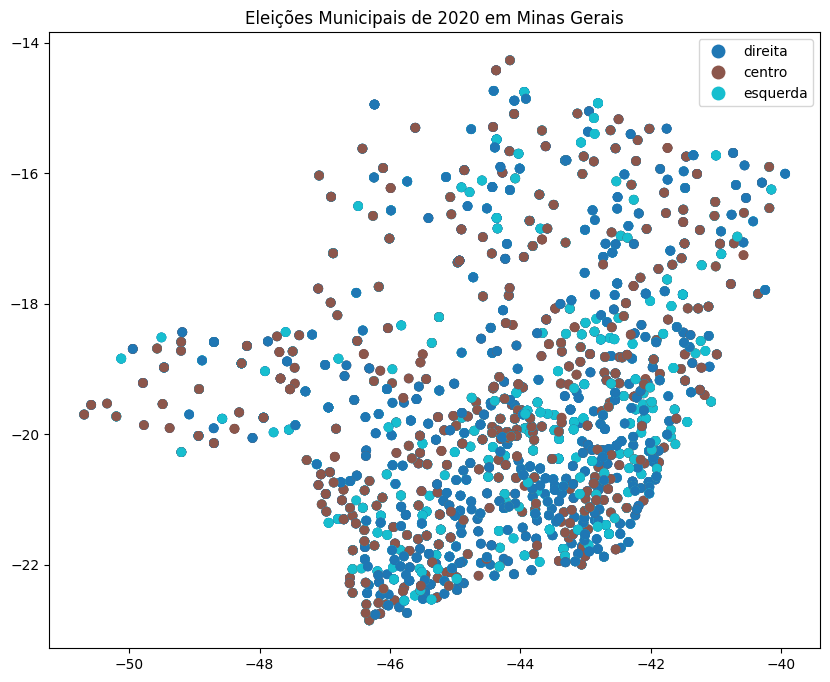

In [74]:
plot_mapa(candidatos_mais_votados_2020_geo_df, 2020)

C:\Users\marce\AppData\Local\Temp\ipykernel_14828\1066555661.py:40: UserWarning:

The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.



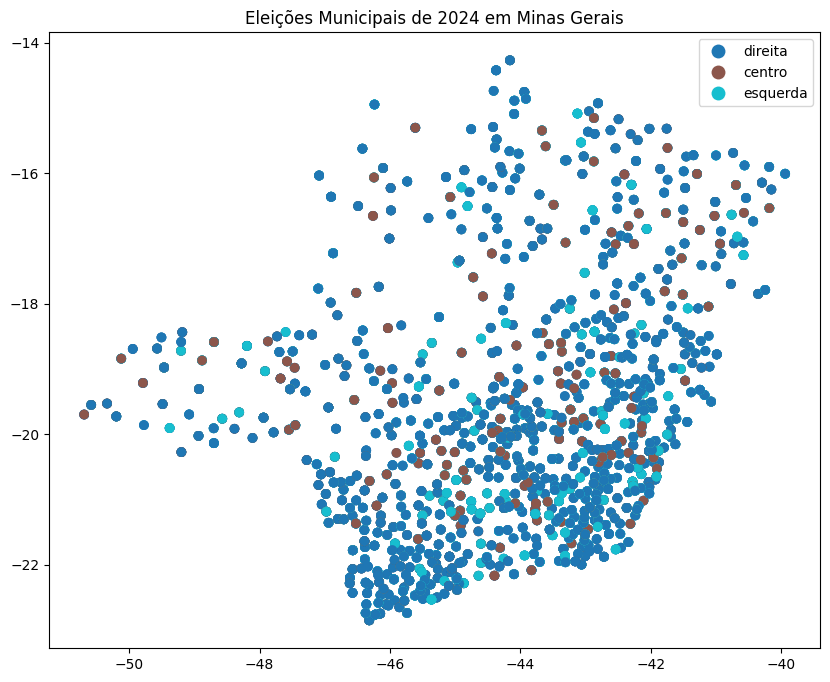

In [75]:
plot_mapa(candidatos_mais_votados_2024_geo_df, 2024)